# CS-EJ3311 - Deep Learning with Python, 09.09.2020-18.12.2020

## Round 2 - Introduction to Artificial Neural Networks 

S. Abdurakhmanova, B. Karki, J.P. Bartaula and A. Jung

Aalto University (Espoo, Finland)  
fitech.io (Finland)

This round discusses how to represent and learn good predictor maps using an **artificial neural network (ANN)**. The use of ANN has become very convenient with powerful high-level libraries such as the Python library `keras`(https://keras.io/). The `keras` library provides methods that allow to design and train an ANN using few lines of Python code. We will showcase the use of ANN in a simple classification task. This classification task is to predict the category for a shop item based on a low-resolution image of the item.

## Learning Goals

- understand that ANNs represent non-linear predictor maps that take **features as input and ouput a predicted label**
- understand that ANNs include **parameters (weights and bias terms)** that can be adjusted
- understand the basic **building blocks of an ANN**: weighted connections, activiation functions, layers 
- understand how ANN parameters are **adjusted (learnt) by minimizing a loss function** using optimization methods (e.g., stochastic gradient descent)
- to be able to use Keras library to **specify and train** a simple ANN on given training data 
- to be able to **critically evaluate** the quality of the trained ANN  

## Recommended Reading

-   [Chapter 3](https://livebook.manning.com/book/deep-learning-with-python/chapter-3) of "Deep Learning with Python" by F. Chollet. 
- how ANN can [represent complex functions](http://neuralnetworksanddeeplearning.com/chap4.html) 
- <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>What does "sample", "batch", "epoch" mean? From Keras FAQ </a>
- <a href='https://www.youtube.com/watch?v=v_4KWmkwmsU'>One-hot Encoding explained</a>

## Additional Material (Optional!)

**efficiently computing gradients via backpropagation:**
- intro level [3blue1brown educational series](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
- more in-depth explanation [cs231n Stanford course](https://www.youtube.com/watch?v=d14TUNcbn1k)

**More about TensorFlow, Keras, tf.keras, tensor and tensor operations:**


- Deep Learning with Python F.Chollet, [chapter 3.2](https://livebook.manning.com/book/deep-learning-with-python/chapter-3/45)
- [Keras vs. tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)
- [get started with tf.keras](https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/)

**Regression task with ANN**

- Deep Learning with Python F.Chollet, [chapter 3.6](https://livebook.manning.com/book/deep-learning-with-python/chapter-3/271)

- how ANN can [represent complex functions](http://neuralnetworksanddeeplearning.com/chap4.html) 
- <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>What does "sample", "batch", "epoch" mean? From Keras FAQ </a>
- <a href='https://www.youtube.com/watch?v=v_4KWmkwmsU'>One-hot Encoding explained</a>

## Three Main Components of Deep Learning

Deep learning methods typically consist of three components. 

**Component 1 - Data.** A set of (labeled) data points we use to train and validate or test a deep learning method. We characterize each data point by a (typically very long) feature vector $\mathbf{x}$ (e.g., pixel colour intensities of an image) and a label $y$ (e.g. $y=\mbox{"Cat"}$ or $y=\mbox{"Dog"}$). Consider data points representing an entire movie with individual features being the pixel red, green and blue values for each video frame. The length of resulting feature vector is easily beyond billions. Deep learning methods require a sufficient amount of labeled data points for which we know the true (correct) label values. We need this labeled data to evaluate the quality of a predictor via measuring the loss incurred by its predictions. Deep learning aims at finding predictors such that the predicted label $\hat{y}$ is close to the true label $y$ for any data point (not only those in the training set). 


**Component 2 - Hypothesis Space ("Model").** The hypothesis space is a subset of predictor functions from features to labels. Deep learning methods use a signal-flow diagram, an **artificial neural network (ANN)**, to define such a hypothesis space. A particular ANN structure defines a particular hypothesis space. Each ANN involves adjustable weights that can be varied to obtain different predictor maps. For a specific choice for the weights, we can evaluate the predictor map by feeding the features as input to an ANN and execute simple computations to end up with a predicted label at its output. 

**Component 3 - Loss Function.** We need a loss function to measure the quality of the predictor function obtained for a particular choice for the ANN weights. To compute the loss incurred by an ANN with specific weights, we need data points for which we know the true labels. In general, we need at least two different sets of labeled data points. One set is the **training set** and will be used to adjust (optimize or learn) the ANN's weights. The other set is the **validation set** and will be used to determine if an ANN **generalizes** well to data points outside the training set. This validation set, therefore, allows us to detect the occurrence of **overfitting**. In the case of overfitting, the training error is significantly smaller than the validation error. 

<img src="ThreeBlocks.png" width="600">

Deep learning methods use optimization methods to search (optimize) the weights of an ANN such that it yields a predictor function which incurs smallest average loss over some labeled data points ("training data"). 

<img src="MLOptProblem.png" width="400">

## Artifical Neurons - The Atoms of an Artificial Neural Network 

Each ANN is a network of interconnected elementary computational units. These computational units are referred to as **artificial neurons** or just **neurons**. The simplest ANN consists of a single artificial neuron:  

<img src="perceptron.png" width="600">

The inputs of the artifical neuron are weighted and summed up in $z = w_{0}+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}$. We often need to add a bias or offset to the inputs. This can be implemented via feeding in an extra input which is always equal to one and weighted by a special weight $w_{0}$. 

The artificial neuron then applies a non-linear **activation function** to the weighted sum $z$. The output $g(z)$ of a neuron is often referred to as the **activation**. If we would use a linear activation function $g(z) = a z + b$, the ANN would reduce to a linear predictor map. A less trivial choice for the activiation function is the sigmoid function $g(z) = 1/(1+\exp(-z))$ which yields logistic regression as another special case of this single-neuron ANN. 

## Organizing Neurons as Layers 

Deep learning methods use ANNs containing billions of interconnected artificial neurons. It turns out to be beneficial statistically and computationally to organize the artificinal neurons into consecutive layers that are sequentially connected. Each layer is constituted by several individual neurons whose input is taken from the outputs of the previous layer. 

Why the layer-wise organization of neurons in a chain-like structure has been so successful in deep learning mehtods is still subject to research. A solid theory for choosing the number of layers (the depth of the ANN) for a given dataset is still lacking. In practive, the application of deep learning methods still require a lot of experimentation ("trial and error"). However, one useful approach is to start from an existing ANN structure that has been proven useful for related datasets and then modify (tailor) it to the application at hand (see Round 5 on "Transfer Learning"). 

Throughout this course, we will use layers consisting of several artificial neurons as the main building block for designing ANN. The layers are "stacked" on top of each other to comprise a more complex ANN model (although other ANN architectures also [exist](https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png)).
The figure below illustrates an ANN with four layers: input layer, two hidden layers and output layer. The hidden layers are called "hidden", beacuse in contrast to input and output layers we cannot directly access the inputs and outputs of the hidden layers.

layer 1 - **input layer**. As costumary in the deep learning literature, we refer to the input features $x_{1},\ldots,x_{n}$ of a data point as the input layer. This layer is exceptional as it does not contain any non-linear activation functions. The example below includes 3 features values $x_{1},x_{2},x_{3}$ along with a "dummy" feature $x_{0} = 1$ that is used to implement a bias or offset in the following artificial neuron.

layer 2 - **hidden layer** This layer consists of six neurons. Each neuron in this layer receives the input from all neurons of the previouse layer. This type of layers are called fully connected or densely connected layer or **dense layer**.

layer 3 - **hidden layer** This layer is similar to the previouse one, but in this case the input to the layer are the activations of the neurons from the previouse hidden layer.

layer 4 - **output layer** This final layer consists of three output neurons. Each ouput neuron represents one particular class and the ouput value represents the confidence in assigning the data point to that class. 


<img src="ANN.png" width="600">

## A Closer Look At Activiation Functions

As mentioned before, a neuron consists of a non-linear activation function. You will rarely encounter a ANN usng linear activiation functions or even omitting the activation function and directly using the weighted sum of the input as the neuron output. Indeed, a ANN using only linear activation functions can only implement a linear map from the input features to the output. No matter how many layers we stack on top of each other, the overal behavior of the ANN will always be a linear map. \
For example, let's take a simple ANN with two neurons in a hidden layer and one output neuron without adding any activation function. For a data point with only one feature $x_{1}$ the hidden neurons will output weighted sums $z_{1} = w_{0}^{1}+w_{1}^{1}x_{1}$ and $z_{2} = w_{0}^{2}+w_{1}^{2}x_{1}$, where $w_{0}^{1}$ and $w_{1}^{1}$ are the bias and weight for a first hidden neuron and $w_{0}^{2}$ and $w_{1}^{2}$ are the bias and weight for a second hidden neuron. On the figure below you can see the outputs of these hidden neurons (blue line) for a range of values $\{x_{1}|-10\leq x_{1}\leq 10\}$. The last neuron will output weighted sum $a_{1} = w_{0}^{3}+w_{1}^{3}x_{1}$, where $w_{0}^{3}=w_{0}^{1}+w_{0}^{2}$ and $w_{1}^{3}=w_{1}^{1}+w_{1}^{2}$. In other words, it doesn't matter how we will change the bias and weight values of the neurons - the network will always return linear predictor.
<img src="lincomb.png" width="600">

Thus, using ANNs with linear activation functions is equivalent to using linear predictor maps. In order to learn more complex (non-linear) predictor maps, we need to use ANNs with non-linear activation functions. There are no widely applicable guidlines that suggest which particular activiation function to use for a given application. However, some choices have proven useful in many application domains. Two such choices for the activation function are the 

\begin{equation} 
\mbox{rectified linear unit ("ReLU") } g(z) = {\rm max} \{0,z\}, 
\end{equation}

and the 

\begin{equation} 
\mbox{sigmoid function } g(z) = 1/(1+\exp(-z)). 
\end{equation} 

<img src="activation.png" width="600">


You can find a discussion of other popular choices for the activation function [here](https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png). 

Learning the weights for a single neuron using a sigmoid activiation function is equivalent to logistic regression (see the prerequisite course "CS-EJ3211 Machine Learning with Python"). 

The figure below indicates how using nerons with an ReLU activation function results in a non-linear map between the input and the output of the ANN. ReLU activation function is applied to the output of the two hidden neurons $z_{1} = w_{0}^{1}+w_{1}^{1}x_{1}$ and $z_{2} = w_{0}^{2}+w_{1}^{2}x_{1}$, thus introducing nonlinearity to the network. The output neurons then can generate non-linear predictor by combining the output of the hidden neurons with activation function: $a_{1} = g(z_{1}) + g(z_{2})$.\
Using a sufficiently large number of hidden layers and more neurons within an ANN allows to accurately learn highly non-linear relations between the input features and the ouput of an ANN. From a computational complexity point of view, the relevant parameter is not the number of neurons but the number of connections (links) between the neurons. These strength or weight of these connections must be adjusted (learnt) by optimization methods. The more weights to be adjusted, the more computational resources (memory, processing time) are required by the training process. 

<img src="relucomb.png" width="800">

The sigmoid function is a popular choice for the activation function of the neurons in the final or output layer. Indeed, the value range of the sigmoid function is the interval of real number betewen $0$ and $1$. Thus, we can interpret the output of the sigmoid activiation function as a probability or degree of belonging to a certain class or category. For the neurons in the hidden layers, the ReLU activation function is a popular choice. 


<img src="activation_layers.png" width="600">

The ANN depicted above contains an output layer with three similar neurons having the same sigmoid activation function. Sigmoid activation function is applied to each of the outputs independently. Each of these three ouput neurons could represent the degree of belonging to a certain class. The top neuron could represent the class "Car" (vs. "No Car"), the middle neuron the class "Tree" (vs. "No Tree") and the bottom output neuron the class "Fish" (vs. "No Fish"). This representation of class labels is useful when the data point can belong to several classes at the same time (**multilabel classification**). For example, when you need to identify which objects are present on the image. There might be no cat, tree or car present on the picture or might be only cat or two objects, car and cat, etc.

On the other hand, if only one class can be assighned to the data point (**multiclass classification**), **softmax** activation function is used. In contrast to the sigmoid activation, softmax depends on all neurons belonging to the same layer. The probabilities of belonging to a certain class returned by softmax are summed up to 1, while this is not a case for sigmoid activation function. The softmax activation function is defined for all neurons within the same layer as 

$$g_{i} = \exp(z_{i})/\sum_{j \in \mbox{layer}} \exp(z_{j}).$$

Here, $g_{i}$ denotes the output of the $i$th neuron in the layer and the sum in the denominator ranges over all neurons $j$ in the same layer. \
\
In conclusion, beware that the output layer and accompanying activation function defines the type of predictions that the network makes (classes are not mutually exclusive vs classes are mutually exclusive) and hence its purpose (multilabel vs multiclass classification).

## ANN Training - Finding Good Weights 

Consider a given ANN structure with a certain number of hidden layers and each layer consisting of a certain number of neurons. To use the ANN we also need to specify the weights for the connections between the neurons. In order to measure the quality of particular choice for the weights, we use the average loss $f(\mathbf{w})$. The average loss is obtained by applying the ANN with weights $\mathbf{w}$ to a training set consisting of labeled data points. 

It turns out that a very successful method to find good values for the weights is to use (variants of) stochastic gradient descent (SGD). As discussed in the previous Round 1, SGD is an iterative method that updates the current weight values based on (estimatos of) the gradient of some loss function (training error). 

SGD is based on the following steps, 

**Step 1 - "Initialization".** Choose a first guess (e.g. using random number generators) for the ANN weights.

**Step 2 - "Forward Pass".** Compute the predicted labels $\hat{y}^{(i)}$ for a randomly chosen subset (batch) of the training set. 

**Step 3 - "Backward Pass".** Compute an estimate $g(\mathbf{w})$ for the gradient of the loss using the resulting prediction errors $\hat{y}^{(i)} - y^{(i)}$.  

**Step 4 - "Gradient Step".** Update the ANN weights by taking a (small) step into the opposite direction of the gradient: $\mathbf{w} \mapsto \mathbf{w} - \alpha g(\mathbf{w})$. 

**Step 5 - "Stopping Criterion".** If stopping criterion not met, go to Step 2. 

<img src="ANN_cycle.png" width="800">
<center><a href="https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e">figure modified from </a></center>

The algorithmic structure of SGD is the same for linear regression, which uses linear predictor maps, and deep learning methods, which use non-linear predictor maps represented by an ANN. The difference between these methods is only the actual computation of the predictions (Step 2) and the gradient estimate (Step 3). 

Step 2 computes the output (predictions) and is referred to as the **forward pass** or forward propagation. We can  interpret the evaluation $h(\mathbf{x})$ of the predictor map represented by the ANN as a sequence of computations whose results flow "forward", from input layer to the output layer in the ANN. 

Step 4 computes (an estimate of) the gradient of the loss function is called **backward pass** or backward propagation (or back prop for short). This name is inspired by the temporal order of the computations used to evalute the gradient (estimate). Loosely speaking, the gradient is computed by combining intermediate results that "propagate" from the output layer towards the input layer. In the end, the backward pass is nothing but a clever way to compute the gradient of a function using the ["chain rule"](https://www.mathsisfun.com/calculus/derivatives-rules.html).

The detailed calculations carried out within the backward pass of SGD for an ANN is beyond the scope of this course. Instead, we will use ready-made Python functions provided by the library `keras`. This library provides methods to specify and train ANNs. These methods require only to choose some variant of SGD, to be used for tuning the ANN weights, and the corresponding SGD hyperparamters. Examples for these hyperparameters are the learning rate, the mini-batch size and splitting ratio between training and test set. 

After repeating Step 2 - Step 4 of SGD for a number $r$ of iterations, we obtain the weights $\mathbf{w}^{(r)}$. To monitor the progress of the learning process we use the training loss $f\big(\mathbf{w}^{(r)}\big)$ and the validation loss $f_{\rm val}\big(\mathbf{w}^{(r)}\big)$. 

The training loss is the average loss obtained by predicting the labels $y$ of the training data points using the predictions $\hat{y}=h^{(\mathbf{w}^{(r)})}(\mathbf{x})$ with the features $\mathbf{x}$ and the predictor map $h^{(\mathbf{w}^{(r)})}$ represented by the ANN weights $\mathbf{w}^{(r)}$. Similarly, the valiation loss is obtained by the prediction error incurred by $h^{(\mathbf{w}^{(r)})}$ on the data points in the validation set (which is a different set of data points). 


A nice visualization of the training process for different ANN structures can be found at the [Neural Network playground](https://playground.tensorflow.org/)!

## The Python Deep Learning Library "Keras"

Let us now introduce some basic functions provided by the Python library `Keras`. Keras provides a high-level API for the low-level deep learning framework TensorFlow. It has been designed for quick and easy model design and training. 
The typical workflow of constructing and training an ANN using `keras` is as follows:
 
 1. define the training and validation data
 2. define the ANN structure (layers, number of neurons in the layer, activation function)
 3. choose a loss function, optimizer (gradient-based iterative algorithm) and some metric to monitor the learning process
 4. tune the weights of the ANN by using the `fit()` method

We start with importing the libraries required later on. 

In [ ]:
import numpy as np               # library for numerical arrays (vectors, matrices, tensors)
import matplotlib.pyplot as plt  # library providing tools for plotting data 
import tensorflow                # tensorflow library providing methods for defining and training ANN 

### Step 1 - Loading Data

In what follows, we will use the [Fashion-MNIST ](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset which is provided within keras. This dataset consists of data points representing articles of an online shop. Each article is characterized by an $28 \times 28$ pixels grayscale image. Moreover, each article is associated with a label $y$ that indicates to which of $10$ classes (or produce categories) this article belongs. The entire dataset consists of $60000$ data points used as training and validation set and another $10000$ data points used as test set. 

The $10000$ data points in the test set must not be used for learning the ANN weights and also not for monitoring the progress (validation) of the gradient method. Indeed, the monitoring of the validation error is some form of model adjustment as we use the validation error to decide when to stop the gradient method.  

In [2]:
# load dataset
from tensorflow.keras.datasets import fashion_mnist
(trainval_images, trainval_labels), (test_images, test_labels_numeric) = fashion_mnist.load_data()

# shape of train and test image
print(f'Number of training and validation examples{trainval_images.shape}')
print(f'Number of test examples{test_images.shape}')

4423680/4422102 [==============================] - 0s 0us/step
Number of training and validation examples(60000, 28, 28)
Number of test examples(10000, 28, 28)


In [3]:
# the label values are stored as integer numbers, in the range [0, 9]
# these numeric labels correspond to the classes of clothing items the image represent:

labels = np.unique(test_labels_numeric)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


The code snippet below maps the numeric label values to class names. The class names are defined according to [here](https://www.tensorflow.org/tutorials/keras/classification)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

# display numeric label and corresponding class name 
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 T-shirt/top
1 		 Trouser
2 		 Pullover
3 		 Dress
4 		 Coat
5 		 Sandal
6 		 Shirt
7 		 Sneaker
8 		 Bag
9 		 Ankle boot


Let's visualize few data points (images).

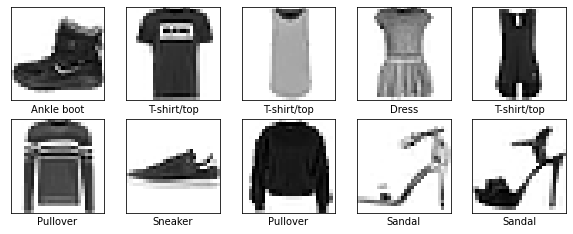

In [5]:
# visuale 10 first images from training set
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(trainval_images[:10],trainval_labels[:10]):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # remove ticks on x-axis
    plt.yticks([]) # remove ticks on y-axis
    plt.imshow(image, cmap='binary') # set the colormap to 'binary' 
    plt.xlabel(class_names[label])
    i += 1
plt.show()

Each shop item is characterized by a feature vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)$ of length $n = 784$ which corresponds to $28 \times 28$ pixels. The feature $x_{i}$ is the grayscale values of $i$th pixels. A black pixel has grayscale value 0, while a white pixel has grayscale value $255$. 

The code snippet below reads in one data point (shop item) and illustrates its features, i.e., grayscale values of each pixel. We refer to the stacking of a two-dimensional array of pixel grayscale values into a one-dimensional vector $\mathbf{x}$ as "flattening". 

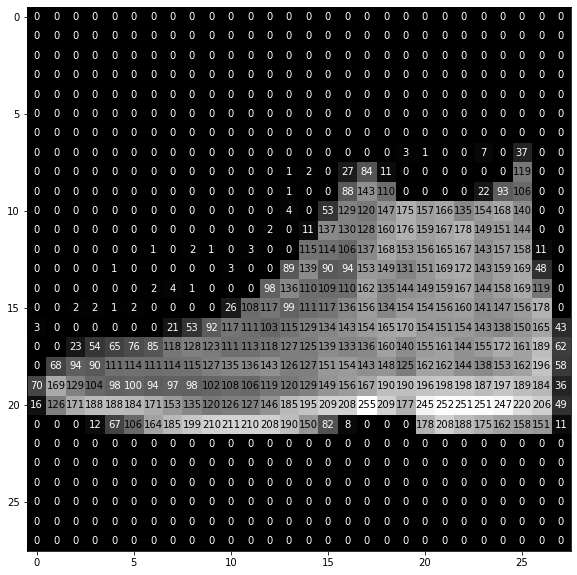

In [6]:
# select the image to visualize
img = test_images[0]
# create figure and axis objects
fig, ax = plt.subplots(1,1,figsize = (10,10)) 
# display image
ax.imshow(img, cmap='gray')
width, height = img.shape
# this value will be needed in order to change the color of annotations
thresh = img.max()/2.5

# display grayscale value of each pixel
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # if a pixel is black set the color of annotation as white
                    color='white' if img[x][y]<thresh else 'black')

The code snippet below converts the label values of the data points into a "one_hot" represenation. See [here](https://keras.io/api/utils/python_utils/#to_categorical-function) for more info. 

In [7]:
trainval_labels = tensorflow.keras.utils.to_categorical(trainval_labels)   # convert the data type for label values in training set
test_labels     = tensorflow.keras.utils.to_categorical(test_labels_numeric)   # convert the data type for label values in test set 

print("label in numeric form of first data point in test set: ",test_labels_numeric[0])
print("label in one-hot form of first data point in test set: ",test_labels[0])

label in numeric form of first data point in test set:  9
label in one-hot form of first data point in test set:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Step 2. Define Hypothesis Space - ANN Structure

To classify the shop items into 10 categories we learn a predictor map represented by an ANN. The ANN reads in the features $x_{i}$ of a shop item, which are the grayscale values of the item picture. The ouput of the ANN are probabilities, or degrees of belonging, for each of the ten different categories. 

In particular, we use an ANN with the following layers:

- one input layer followed by 
- one dense layer with ReLU activation functions, follows by 
- one dense output layer using softmax activation function. 

The first layer consists of the individual features and is the entry point to the ANN. The first layer is connected to a dense layer with 128 neurons with the ReLU activiation function. This hidden layer is then followed by the final output layer with ten neurons using the softmax activation function. 

Consider apply the trained ANN to a shop item whose snapshot pixels we fed the ANN as input. The output $\hat{y}_{i}$ of the $i$th neuron in the output layer is the probability with which we assign the shop item to the $i$th category. Note that the outputs $\hat{y}_{i} \in [0,1]$ always sum to one, i.e., $\sum_{i=1}^{10} \hat{y}_{i} =1$. For example, if we obtain the output $\hat{y}_{1} \approx 1$, we are confident in assigning the data point to category $1$. 

In [8]:
# define model architecture

model = tensorflow.keras.Sequential()       # create an object "model" that represents an ANN

# define an input layer with 784 nodes (features) and add a hidden layer with 128 neurons
# the input layer is densely connected with the hidden layer, i.e., there is are links between 
# every pair of input node and neuron in the first hidden layer 

model.add(tensorflow.keras.layers.Dense(128, activation='relu', input_shape=(784,)))  

# add ouput layer consisting of 10 neurons using softmax activation function 
# the preceeding layer is densely connected to the ouput layer

model.add(tensorflow.keras.layers.Dense(10, activation='softmax')) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


We can call `summary()` method on model to see information about model. This method provides following textual information about model.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.
- The layers and their order in the model.
- The output shape of each layer. 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The above summary indicates that the ANN has a total of $d=101770$ parameters (weights and bias) that can be adjusted (trained) based on labeled training data. Basic theory of ML suggests that we would need at least the same number of training examples to reliably train the ANN weights. 

A (crude!) rule of thumb is to have ten times more training data points than learnable weights. This would amount to a training set of around one million data points for which we would need to know the correct labels. 

The above textual model summary above is useful for simple models. However, this textual summary can be difficult to interpret for ANN structures with multiple inputs or outputs. To this end, `tf.keras` provides a function called `plot_model()` to create a graphical summary of the ANN that might be easier to understand.

In [10]:
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### Step 3 - Choose Loss Function and Optimizer (SGD Variant)

Before we can start the training of the ANN, i.e., the tuning of the ANN weights, we need to define:

- the specific SGD variant for tuning the weigths of the ANN
- the loss function used to measure the quality of particular choice for the weights
- the metric to assess the performance of the final choice for the weights. 

The code snippet below illustrates how to choose the categorical crossentropy as loss function, the accuracy (fraction of correctly classified data points) as metric and the "RMSprop" variant of SGD. All these parameters 
are specified using the Keras function `compile()`. 

In [11]:
### compile the model
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Note that using the loss function ["categorial_crossentropy"](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) requires the label values of the data points in the training and validation set to be stored in "one_hot" form. 

Before we process to train and evaluate the model, we will preprocess the data by reshaping it into the shape our model expect, and scaling it so that pixel values lies between 0-1. When training the ANN it is a good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

Since the first the layer in our model is input layer with dimensionality of 784 but our training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We need to transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 

In [12]:
# reshape the training and test images
trainval_images = trainval_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize data to have feature values between 0 and 1
trainval_images = trainval_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Step 4. Training - Adjusting ANN Weights

We are now ready to train our network, which is done via a call to the 'fit' method. Before we run following line of code, let's understand parameters in `fit()` function: validation_split and epochs. 

- **validation_spit:** : valiation_split is used to separate a portion of our training data into a validation dataset and evaluate the performance of our model on that validation dataset each epoch. We can specify the percentage we want to allocate to the validation set by setting this validation_split argument on the fit() function to a percentage of the size of our training dataset.

 So, why do we need validation set anyway? Validation set is used to estimate the performance of a model for a given training run(epoch). Meaning we will use training set to train the model and use validation set (data that's not seen by model during training) to predict while model is being trained.  This will helps us to get insight into whether our model is overfitting or not. We can find out if model is overfitting or not by comparing the accuracy and loss from our training samples to the validation accuracy and validation loss from our validation samples. Further, we can also use these accuracy measures from  these two different set to tune the hyper-parameters (like learning rate, number of epochs the model should be trained) of model.\
$ $

- **batch_size**: Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they are already generate batches of certain size).\
$ $

- **epochs**: This parameter is the number of times we want the optimization algorithm to use the entire dataset for tuning the weights. In general, the training error decreases with increasing number of epochs. 


In [13]:
%%time 
# track execution time

History = model.fit(trainval_images, trainval_labels, validation_split=0.2, batch_size=32, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.5209 - acc: 0.8142 - val_loss: 0.4251 - val_acc: 0.8511
Epoch 2/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.3856 - acc: 0.8596 - val_loss: 0.4331 - val_acc: 0.8510
Epoch 3/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.3492 - acc: 0.8754 - val_loss: 0.3888 - val_acc: 0.8690
Epoch 4/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.3292 - acc: 0.8826 - val_loss: 0.3730 - val_acc: 0.8733
Epoch 5/20
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3188 - acc: 0.8871 - val_loss: 0.3469 - val_acc: 0.8819
Epoch 6/20
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3077 - acc: 0.8907 - val_loss: 0.3712 - val_acc: 0.8763
Epoch 7/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.2964 - acc: 0.8959 - val_loss: 0.

### Plot Training History 

Each `keras` object representing an ANN also provides a `fit()` method which optimizes the ANN weights. This method not only determines a good choice for the weights but also returns a history object. The history object contains different metrics for each epoch of the training (optimization) process. 

The metrics recorded during the training process are stored as a dictionary in the 'History.history' attribute of the History object. To get a better understanding for how well the training process went, it is useful to plot the metrics as a function of epoch number. In particular, these plots allow to analyze 

- how fast the optimization algorithm improves the loss function by adjusting the weights
- whether there is any significant progress made anymore. 
- whether the the resulting predictor is overfitting (validation loss much higher than training loss). 

In [20]:
if int(tensorflow.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

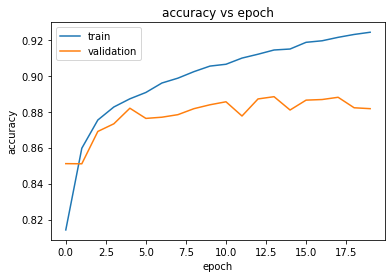

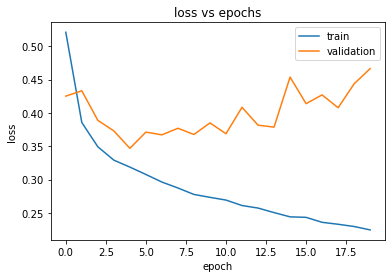

In [21]:
# summarize history for accuracy
plt.plot(History.history[acc_key])
plt.plot(History.history['val_' + acc_key])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss vs epochs')# Let's plot the 


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Final Performance Evaluation on Test Set

After completing the training of the ANN weights, we should evaluate the performance of the predictor map represened by the ANN with the final weights. To this, end we need to use a set of labeled data points which is different from the training and the validation set. Indeed, we have used the training set to train (optimize/tune/adjust) the ANN weights and we have also used the validation set to decide when to stop training. Thus, both the training set and validation set have been used to find the final ANN weights. Therefore we need a test set which is different from the training and the validation set. 

Let's see the accuracy of our model on test set. 

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.5272 - acc: 0.8728


In [18]:
print('Accuracy on test dataset:', test_accuracy)

print(test_labels)

Accuracy on test dataset: 0.8728
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
